<a href="https://colab.research.google.com/github/MohammedMokhless999/Human-Resources-Dataset/blob/main/car_price_(mohammed_mokhless).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("/content/train-data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
data.shape
pd.options.display.float_format = "{:.2f}".format
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.00,6019.00,6019.00,5977.00,6019.00
mean,3009.00,2013.36,58738.38,5.28,9.48
std,1737.68,3.27,91268.84,0.81,11.19
min,0.00,1998.00,171.00,0.00,0.44
25%,1504.50,2011.00,34000.00,5.00,3.50
50%,3009.00,2014.00,53000.00,5.00,5.64
75%,4513.50,2016.00,73000.00,5.00,9.95
max,6018.00,2019.00,6500000.00,10.00,160.00


In [5]:
data.describe(include="O")

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,6019,6019,6019,6019,6019,6017,5983,5983,824
unique,1876,11,5,2,4,442,146,372,540
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,95.13 Lakh
freq,49,790,3205,4299,4929,172,606,235,6


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [7]:
data.isnull().mean()*100

Unnamed: 0           0.00
Name                 0.00
Location             0.00
Year                 0.00
Kilometers_Driven    0.00
Fuel_Type            0.00
Transmission         0.00
Owner_Type           0.00
Mileage              0.03
Engine               0.60
Power                0.60
Seats                0.70
New_Price           86.31
Price                0.00
dtype: float64

In [8]:
data.drop(["Unnamed: 0","New_Price"],axis=1,inplace=True)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00,17.74


In [9]:
data.dropna(axis=0,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 606.8+ KB


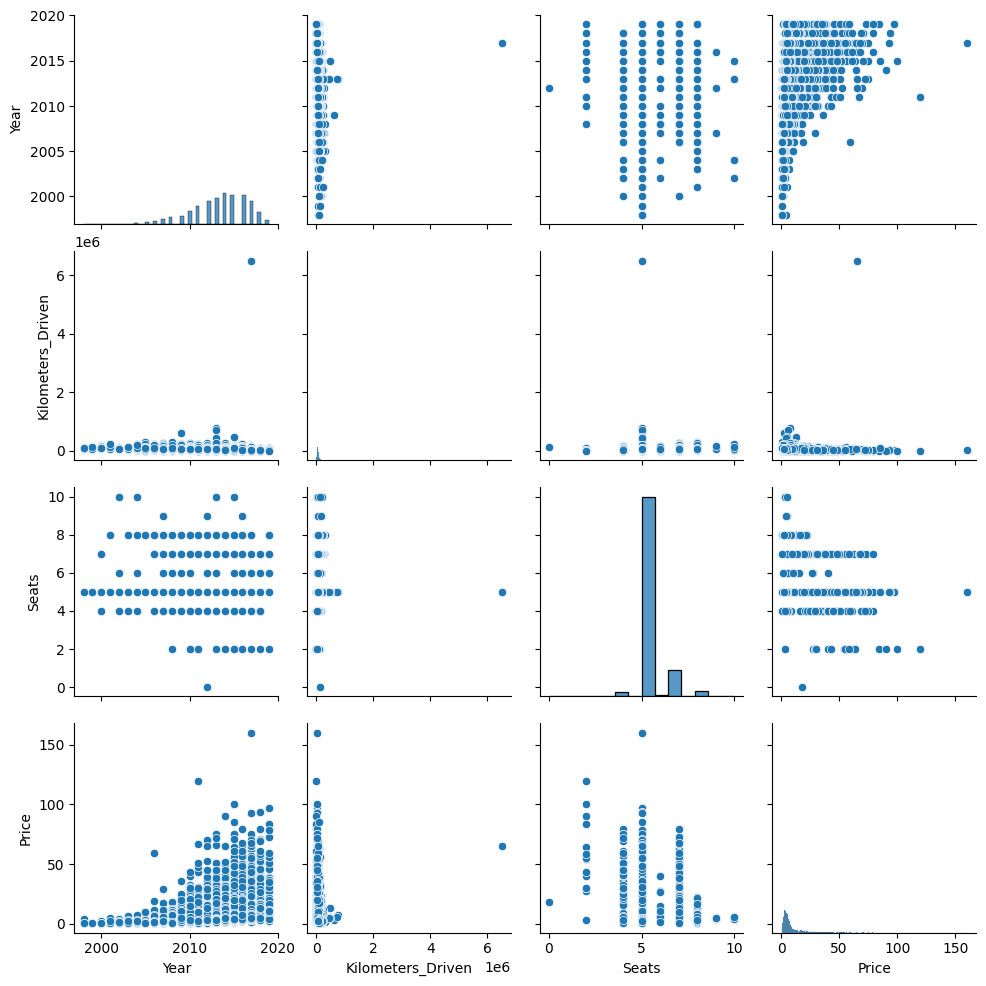

In [10]:
sns.pairplot(data)

In [11]:
data["Name"].nunique()

1855

In [12]:
data.Name.sample(1876)

1209                Audi Q7 35 TDI Quattro Premium Plus
1699             Ford Endeavour 4x2 XLT Limited Edition
3564                             Toyota Corolla Altis G
1105                                 Maruti Wagon R VXI
5442                                Nissan Sunny XL CVT
                             ...                       
3645                             Hyundai Santro Xing XP
1258          Mercedes-Benz E-Class E250 CDI Avantgrade
2729                             Honda CR-V 2.4L 4WD MT
3291    Mercedes-Benz New C-Class C 220 CDI Elegance AT
4040                       Skoda Rapid 1.5 TDI Elegance
Name: Name, Length: 1876, dtype: object

In [13]:
data['Brand']=data.Name.str.split(' ').str[0]
data['Model']=data.Name.str.split(' ').str[1]
data.head() , data.shape


(                               Name    Location  Year  Kilometers_Driven  \
 0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
 1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
 2                      Honda Jazz V     Chennai  2011              46000   
 3                 Maruti Ertiga VDI     Chennai  2012              87000   
 4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
 
   Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
 0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp   5.00   
 1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp   5.00   
 2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp   5.00   
 3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp   7.00   
 4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp   5.00   
 
    Price    Brand   Model  
 0   1.75   Maruti   Wagon  
 1

In [14]:
data.drop('Name',axis=1,inplace=True)

In [15]:
data.shape

(5975, 13)

In [16]:
data['Brand'].nunique(),data['Model'].nunique()

(31, 209)

In [17]:
data['Brand'].value_counts(),data['Model'].value_counts()

(Brand
 Maruti           1197
 Hyundai          1100
 Honda             601
 Toyota            409
 Mercedes-Benz     318
 Volkswagen        315
 Ford              298
 Mahindra          271
 BMW               262
 Audi              236
 Tata              186
 Skoda             173
 Renault           145
 Chevrolet         121
 Nissan             91
 Land               57
 Jaguar             40
 Mitsubishi         27
 Mini               26
 Fiat               25
 Volvo              21
 Porsche            18
 Jeep               15
 Datsun             13
 Force               3
 ISUZU               2
 Smart               1
 Ambassador          1
 Isuzu               1
 Bentley             1
 Lamborghini         1
 Name: count, dtype: int64,
 Model
 Swift     343
 City      265
 i20       247
 Verna     170
 Innova    164
          ... 
 Beetle      1
 Petra       1
 Evalia      1
 Tiguan      1
 F           1
 Name: count, Length: 209, dtype: int64)

In [18]:
for col in ['Owner_Type','Transmission','Fuel_Type','Location','Seats']:
   print(data[col].value_counts())
   print('.'*70)

Owner_Type
First             4903
Second             953
Third              111
Fourth & Above       8
Name: count, dtype: int64
......................................................................
Transmission
Manual       4266
Automatic    1709
Name: count, dtype: int64
......................................................................
Fuel_Type
Diesel    3195
Petrol    2714
CNG         56
LPG         10
Name: count, dtype: int64
......................................................................
Location
Mumbai        784
Hyderabad     741
Kochi         648
Coimbatore    634
Pune          613
Delhi         549
Kolkata       530
Chennai       490
Jaipur        410
Bangalore     353
Ahmedabad     223
Name: count, dtype: int64
......................................................................
Seats
5.00     5012
7.00      674
8.00      134
4.00       99
6.00       31
2.00       16
10.00       5
9.00        3
0.00        1
Name: count, dtype: int64
.........................

In [19]:
data.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Brand',
       'Model'],
      dtype='object')

In [20]:
data['Engine']=data['Engine'].str.split(' ').str[0]
data['Power']=data['Power'].str.split(' ').str[0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5975 non-null   object 
 1   Year               5975 non-null   int64  
 2   Kilometers_Driven  5975 non-null   int64  
 3   Fuel_Type          5975 non-null   object 
 4   Transmission       5975 non-null   object 
 5   Owner_Type         5975 non-null   object 
 6   Mileage            5975 non-null   object 
 7   Engine             5975 non-null   object 
 8   Power              5975 non-null   object 
 9   Seats              5975 non-null   float64
 10  Price              5975 non-null   float64
 11  Brand              5975 non-null   object 
 12  Model              5975 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 653.5+ KB


In [21]:
data.Engine = pd.to_numeric(data.Engine)
data.Power = pd.to_numeric(data.Power,errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5975 non-null   object 
 1   Year               5975 non-null   int64  
 2   Kilometers_Driven  5975 non-null   int64  
 3   Fuel_Type          5975 non-null   object 
 4   Transmission       5975 non-null   object 
 5   Owner_Type         5975 non-null   object 
 6   Mileage            5975 non-null   object 
 7   Engine             5975 non-null   int64  
 8   Power              5872 non-null   float64
 9   Seats              5975 non-null   float64
 10  Price              5975 non-null   float64
 11  Brand              5975 non-null   object 
 12  Model              5975 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 653.5+ KB


In [22]:
data.Mileage

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
6014     28.4 kmpl
6015     24.4 kmpl
6016     14.0 kmpl
6017     18.9 kmpl
6018    25.44 kmpl
Name: Mileage, Length: 5975, dtype: object

In [23]:
def get_mileage(x):
  num = float(x.split(' ')[0])
  unit = x.split(" ")[1]
  if unit == "km/kg":
      return num
  elif unit == "kmpl":
      return num/0.74
  else:
      return np.nan
data.Mileage = data.Mileage.apply(get_mileage)

In [24]:
data.head(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.00,1.75,Maruti,Wagon
1,Pune,2015,41000,Diesel,Manual,First,26.58,1582,126.20,5.00,12.50,Hyundai,Creta
2,Chennai,2011,46000,Petrol,Manual,First,24.59,1199,88.70,5.00,4.50,Honda,Jazz
3,Chennai,2012,87000,Diesel,Manual,First,28.07,1248,88.76,7.00,6.00,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,20.54,1968,140.80,5.00,17.74,Audi,A4
5,Hyderabad,2012,75000,LPG,Manual,First,21.10,814,55.20,5.00,2.35,Hyundai,EON
6,Jaipur,2013,86999,Diesel,Manual,First,31.19,1461,63.10,5.00,3.50,Nissan,Micra
7,Mumbai,2016,36000,Diesel,Automatic,First,15.35,2755,171.50,8.00,17.50,Toyota,Innova
8,Pune,2013,64430,Diesel,Manual,First,27.76,1598,103.60,5.00,5.20,Volkswagen,Vento
9,Chennai,2012,65932,Diesel,Manual,Second,30.14,1248,74.00,5.00,1.95,Tata,Indica


In [25]:
data.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Brand',
       'Model'],
      dtype='object')

<Axes: xlabel='Price', ylabel='Count'>

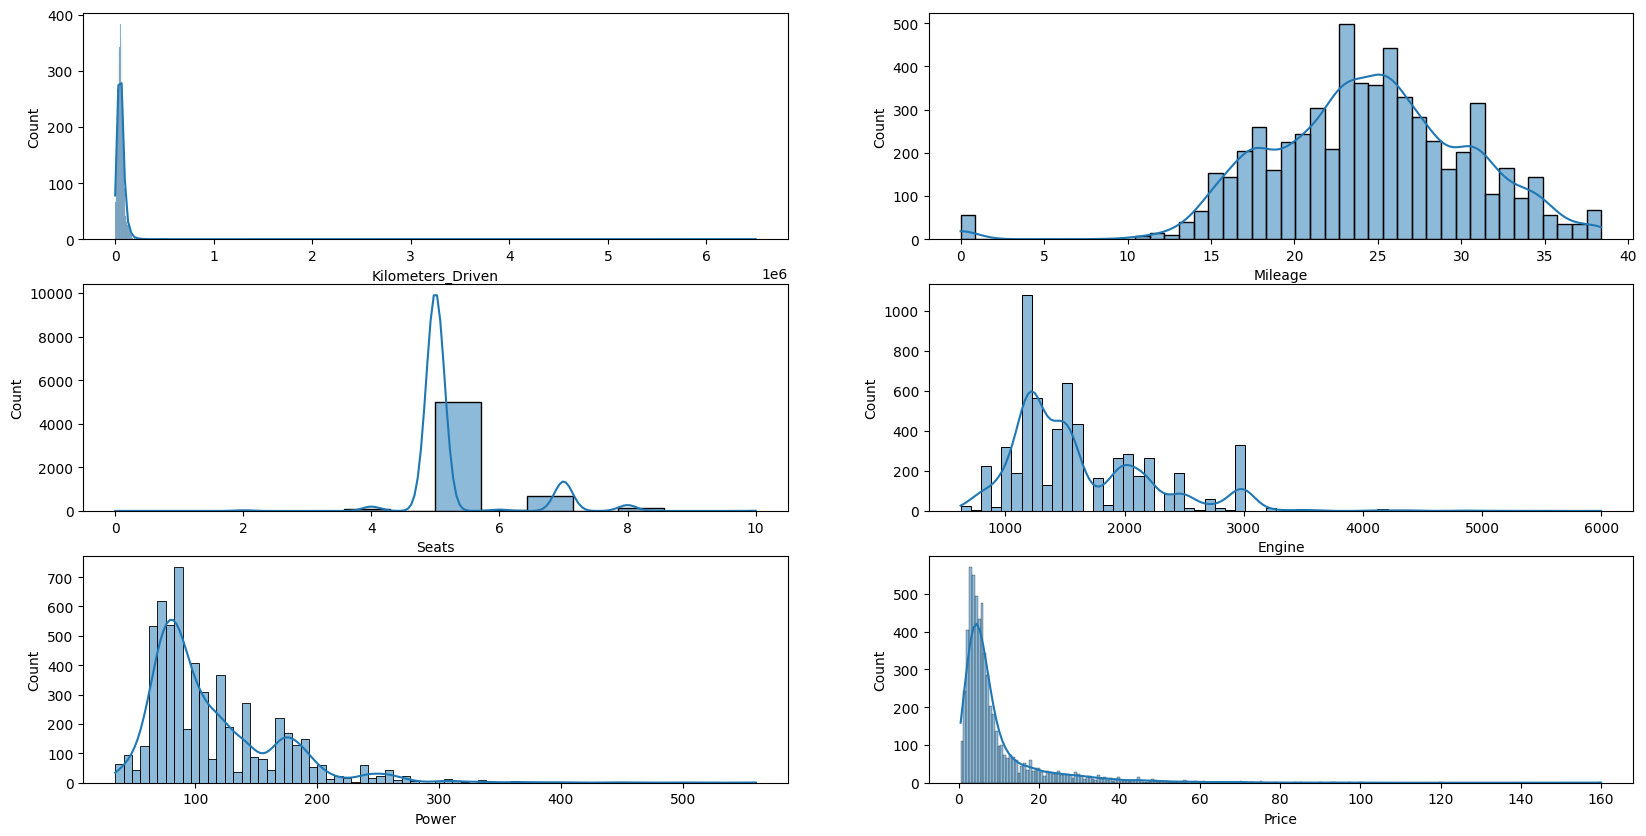

In [26]:
fig,axes = plt.subplots(3,2,figsize=(20,10))
sns.histplot(ax=axes[0,0],data=data,x="Kilometers_Driven",kde=True)
sns.histplot(ax=axes[0,1],data=data,x="Mileage",kde=True)
sns.histplot(ax=axes[1,0],data=data,x="Seats",kde=True)
sns.histplot(ax=axes[1,1],data=data,x="Engine",kde=True)
sns.histplot(ax=axes[2,0],data=data,x="Power",kde=True)
sns.histplot(ax=axes[2,1],data=data,x="Price",kde=True)

<Axes: xlabel='Price'>

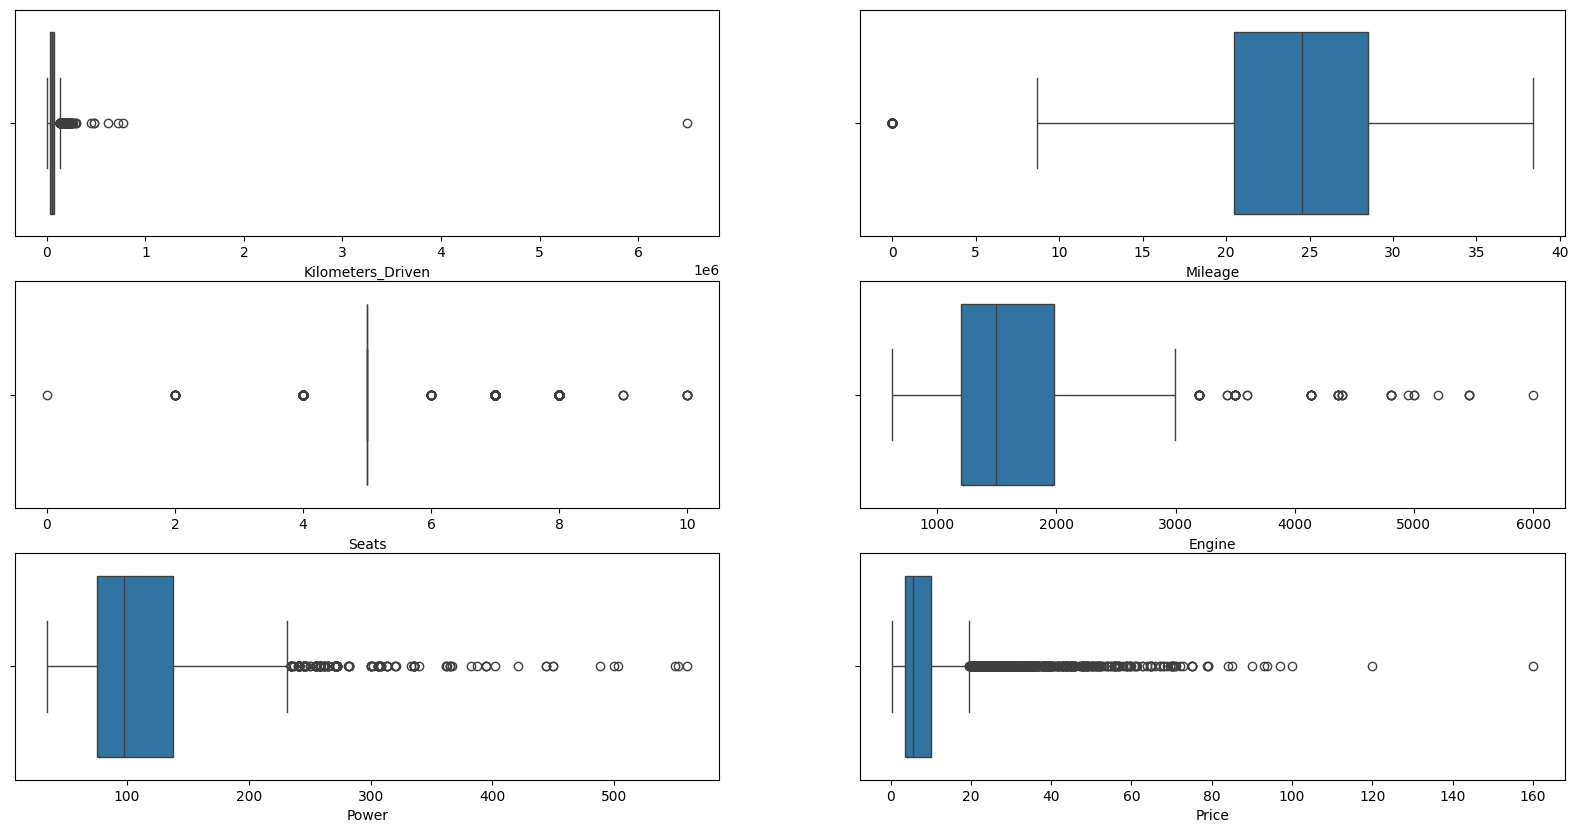

In [27]:
fig,axes = plt.subplots(3,2,figsize=(20,10))
sns.boxplot(ax=axes[0,0],data=data,x="Kilometers_Driven")
sns.boxplot(ax=axes[0,1],data=data,x="Mileage")
sns.boxplot(ax=axes[1,0],data=data,x="Seats")
sns.boxplot(ax=axes[1,1],data=data,x="Engine")
sns.boxplot(ax=axes[2,0],data=data,x="Power")
sns.boxplot(ax=axes[2,1],data=data,x="Price")

In [28]:
data_num =[col for col in data.columns if data[col].dtype!="O"]
data[data_num].quantile([0, 0.1, 0.25,  0.9, 0.95, 0.99, 1])


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0.00,1998.00,171.00,0.00,624.00,34.20,0.00,0.44
0.10,2009.00,20000.00,17.30,1061.00,67.04,5.00,2.35
0.25,2012.00,33908.00,20.50,1198.00,75.00,5.00,3.50
0.90,2017.00,96719.00,32.28,2494.00,184.00,7.00,22.50
0.95,2018.00,120000.00,34.32,2982.00,204.00,7.00,32.50
0.99,2019.00,172297.00,37.96,3197.26,287.22,8.00,56.04
1.00,2019.00,6500000.00,38.38,5998.00,560.00,10.00,160.00


In [29]:
data_copy=data.copy()
data_copy=data_copy[data_copy.Kilometers_Driven < data_copy.Kilometers_Driven.quantile(0.99)]
data_copy=data_copy[data_copy.Mileage > 0 ]
data_copy=data_copy[data_copy.Seats >0]
data_copy=data_copy[data_copy.Price < 100]
data_copy=data_copy[data_copy.Engine <5000]
data_copy=data_copy[data_copy.Power <1000]
data_copy[data_num].quantile([0, 0.1, 0.25,  0.9, 0.95, 0.99, 1])


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0.00,1998.00,171.00,10.14,624.00,34.20,2.00,0.44
0.10,2009.00,19815.00,17.34,1042.20,67.04,5.00,2.40
0.25,2012.00,33116.50,20.81,1198.00,75.00,5.00,3.51
0.90,2017.00,93000.00,32.43,2494.00,184.00,7.00,22.24
0.95,2018.00,114703.25,34.32,2979.00,204.00,7.00,32.00
0.99,2019.00,150000.00,37.96,2993.42,272.00,8.00,55.81
1.00,2019.00,172050.00,38.38,4951.00,550.00,10.00,97.07


<Axes: >

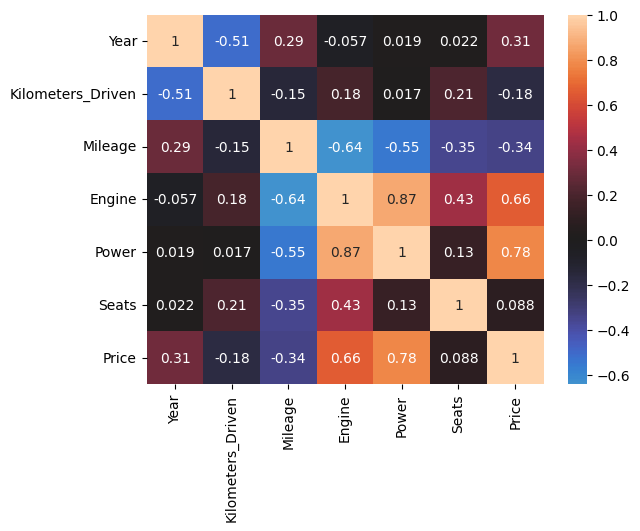

In [30]:
sns.heatmap(data_copy[data_num].corr(),annot=True,center=0)

In [31]:
data_copy[data_num].corr()["Price"].apply(lambda X :abs(X)).sort_values(ascending=False)

Price               1.00
Power               0.78
Engine              0.66
Mileage             0.34
Year                0.31
Kilometers_Driven   0.18
Seats               0.09
Name: Price, dtype: float64

In [32]:
#Data Splitting
X = data_copy.drop("Price",axis=1)
y=data_copy["Price"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
#num_cols = [col for col in X.columns if X[col].dtype !="O"]
#cat_cols = [col for col in X.columns if X[col].dtype == "O"]
num_cols = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Year']
cat_cols = ['Location', 'Fuel_Type', 'Transmission', 'Brand', 'Model']
ord_cat_cols = ['Owner_Type']
num_cols , cat_cols

(['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Year'],
 ['Location', 'Fuel_Type', 'Transmission', 'Brand', 'Model'])

In [34]:
pip install category_encoders


In [35]:
from sklearn.preprocessing import StandardScaler ,OrdinalEncoder
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
num_pipeline = Pipeline(steps=[("imputer",SimpleImputer(strategy="median")),
                               ("sc",StandardScaler())])
cat_pipeline = Pipeline(steps=[("binary",BinaryEncoder())])
ord_cat_pipeline = Pipeline(steps=[("ordinal",OrdinalEncoder())])
data_prep = ColumnTransformer(transformers=[("num pipeline",num_pipeline,num_cols),
                                            ("cat pipeline",cat_pipeline,cat_cols),
                                            ("ord cat pipeline",ord_cat_pipeline,ord_cat_cols)])
X_train_prep = data_prep.fit_transform(X_train)
X_test_prep = data_prep.transform(X_test)
X_train_prep.shape,X_test_prep.shape

((4624, 29), (1156, 29))

In [36]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train_prep,y_train)
y_pred = LR.predict(X_test_prep)
from sklearn.metrics import r2_score , mean_squared_error
print("R2 score is : ",r2_score(y_test,y_pred))
print("RMSE IS : ",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score is :  0.6999685075999569
RMSE IS :  5.533803742763303


In [37]:
print("training accuarcy : ",LR.score(X_train_prep,y_train)*100)
print("testing accuarcy : ",LR.score(X_test_prep,y_test)*100)

training accuarcy :  72.72206587215727
testing accuarcy :  69.99685075999568


In [38]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_prep)
X_test_poly = poly.transform(X_test_prep)
LR_poly = LinearRegression()
LR_poly.fit(X_train_poly,y_train)
y_pred_poly = LR_poly.predict(X_test_poly)
#Accuarcy
print("Training accuarcy : ",LR_poly.score(X_train_poly,y_train)*100,"%")
print("Testin accuarcy : ",LR_poly.score(X_test_poly,y_pred_poly)*100,"%")

Training accuarcy :  93.39486548392598 %
Testin accuarcy :  100.0 %


In [39]:
X_train_poly.shape , X_train_prep.shape

((4624, 465), (4624, 29))

In [40]:
from sklearn.linear_model import Ridge , Lasso
ridge = Ridge(alpha=0.1)
lasso = Lasso(alpha=0.01)
ridge.fit(X_train_poly,y_train)
lasso.fit(X_train_poly,y_train)
y_pred_ridge = ridge.predict(X_test_poly)
y_pred_lasso = lasso.predict(X_test_poly)
print("RMSE for ridge : ",np.sqrt(mean_squared_error(y_test,y_pred_ridge)))
print("r2 score for ridge : ",r2_score(y_test,y_pred_ridge))
print("*"*30)
print("RMSE for lasso : ",np.sqrt(mean_squared_error(y_test,y_pred_lasso)))
print("r2 score for lasso : ",r2_score(y_test,y_pred_lasso))

RMSE for ridge :  3.0290784053858286
r2 score for ridge :  0.9101040002897212
******************************
RMSE for lasso :  3.1322138794358705
r2 score for lasso :  0.903878142195897


In [41]:
for alpha in [0.01,0.1,1,10,100]:
   ridge = Ridge(alpha=alpha)
   ridge.fit(X_train_poly,y_train)
   y_pred_ridge = ridge.predict(X_test_poly)
   print("aplha : ",alpha)
   print("r2score : ",r2_score(y_test,y_pred_ridge))
   print("____"*3)
#best alpha = 1

aplha :  0.01
r2score :  0.9098542996228874
____________
aplha :  0.1
r2score :  0.9101040002897212
____________
aplha :  1
r2score :  0.9108965410853801
____________
aplha :  10
r2score :  0.9095203444876858
____________
aplha :  100
r2score :  0.9009156980757141
____________


In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly = make_pipeline(PolynomialFeatures(degree=2),Ridge(alpha=1))
poly.fit(X_train_prep,y_train)
y_pred_poly = poly.predict(X_test_prep)
print("RSME : ",np.sqrt(mean_squared_error(y_test,y_pred_poly)))
print("R2_score : ",r2_score(y_test,y_pred_poly))



RSME :  3.0156963702489605
R2_score :  0.9108965410853801


In [43]:
for degree in [2,3,4]:
   poly = make_pipeline(PolynomialFeatures(degree=degree),Ridge(alpha=1))
   poly.fit(X_train_prep,y_train)
   y_pred_poly = poly.predict(X_test_prep)
   print('degree:', degree)
   print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_poly)))
   print('R2:', r2_score(y_test, y_pred_poly))
   print('-----------------------------')
#best degree = 2

degree: 2
RMSE: 3.0156963702489605
R2: 0.9108965410853801
-----------------------------
degree: 3
RMSE: 3.0972376915228903
R2: 0.906012865662285
-----------------------------
degree: 4
RMSE: 4.90864552187
R2: 0.7639289791888911
-----------------------------


In [45]:
def log_transform(x):
   return np.log1p(x)
y_train_log = log_transform(y_train)
y_test_log = log_transform(y_test)

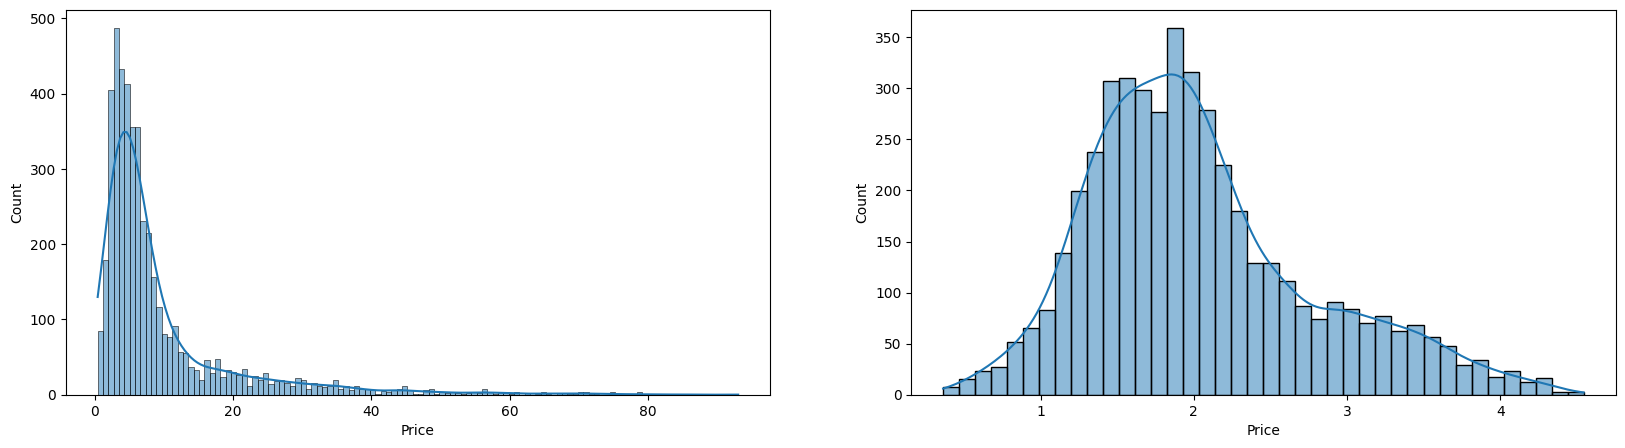

In [46]:
fig ,axes = plt.subplots(1,2,figsize=(20,5))
sns.histplot(ax=axes[0],data=y_train,kde=True)
sns.histplot(ax=axes[1],data=y_train_log,kde=True)
plt.show()

In [47]:
poly_ridge = make_pipeline(PolynomialFeatures(degree=2),Ridge(alpha=1))
poly.fit(X_train_prep,y_train_log)
y_pred_poly = poly.predict(X_test_prep)
print("RSME : ",np.sqrt(mean_squared_error(y_test_log,y_pred_poly)))
print("R2_score : ",r2_score(y_test_log,y_pred_poly))
#This is best Model

RSME :  0.15434573630038323
R2_score :  0.954569307478067
